In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

from celavi.simple_model import Context

np.random.seed(0)

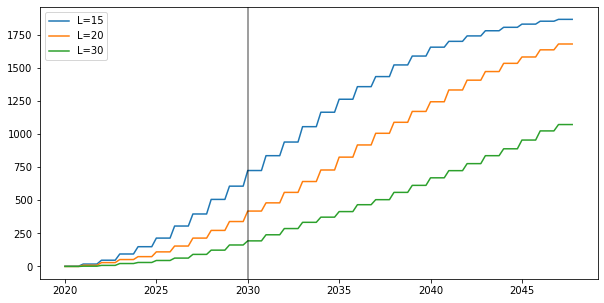

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

lifetimes = [15, 20, 30]
number_of_turbines = 638

for lifetime in lifetimes:
    K = 2.2   # DES Weibull shape parameter
    L = lifetime  # DES Weibull scale parameter

    year_built = 2020

    lifespan_fns = {
        "nacelle": lambda: 30,
        "blade": lambda: round(float(weibull_min.rvs(K, loc=0, scale=L, size=1))),  # EOLs on whole years
        "foundation": lambda: 50,
        "tower": lambda: 50,
    }

    turbine = [
        {
            "kind": "blade",
            "xlat": 39.9106,
            "ylon": -105.2347,
            "year": year_built,
        },
        {
            "kind": "blade",
            "xlat": 39.9106,
            "ylon": -105.2347,
            "year": year_built,
        },
        {
            "kind": "blade",
            "xlat": 39.9106,
            "ylon": -105.2347,
            "year": year_built,
        },
        {
            "kind": "nacelle",
            "xlat": 39.9106,
            "ylon": -105.2347,
            "year": year_built,
        },
        {
            "kind": "tower",
            "xlat": 39.9106,
            "ylon": -105.2347,
            "year": year_built,
        },
        {
            "kind": "foundation",
            "xlat": 39.9106,
            "ylon": -105.2347,
            "year": year_built,
        },
    ]

    components = pd.DataFrame(turbine * number_of_turbines)
    
    context = Context()
    context.populate(components, lifespan_fns)
    landfill_inventory = context.run()
    
    ys = landfill_inventory.loc[160:, "blade"]
    xs = np.arange(len(ys)) / 4 + 2020  # Convert from discrete time to years
    ax.plot(xs, ys, label=f"L={lifetime}")
    
ax.legend(loc="best")
ax.axvline(2030.0, color="k", alpha=0.5)